In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report

In [2]:
fraud=pd.read_csv("E:/SHRADDHA/DA-DS Assignments/DS Assignments/14.A_Decision Trees/Fraud_check.csv")
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
fr=pd.get_dummies(fraud,columns=['Undergrad','Marital.Status','Urban'],drop_first=True)
fr

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0
...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1
596,69967,55369,2,1,0,0,1
597,47334,154058,0,0,0,0,1
598,98592,180083,17,1,1,0,0


In [5]:
fr['income']='test'
fr.loc[fr['Taxable.Income']>30000,'income']='Good'
fr.loc[fr['Taxable.Income']<=30000,'income']='Risky'
fr.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,income
0,68833,50047,10,0,0,1,1,Good
1,33700,134075,18,1,0,0,1,Good
2,36925,160205,30,0,1,0,1,Good
3,50190,193264,15,1,0,1,1,Good
4,81002,27533,28,0,1,0,0,Good


In [6]:
import seaborn as sns

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='income', ylabel='count'>

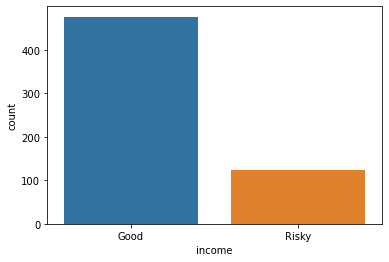

In [7]:
sns.countplot(fr['income'])

In [8]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
le=preprocessing.LabelEncoder()

In [9]:
fr['income']=le.fit_transform(fr['income'])
fr.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,income
0,68833,50047,10,0,0,1,1,0
1,33700,134075,18,1,0,0,1,0
2,36925,160205,30,0,1,0,1,0
3,50190,193264,15,1,0,1,1,0
4,81002,27533,28,0,1,0,0,0


In [10]:
fr.describe()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,income
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333,0.520000,0.323333,0.361667,0.503333,0.206667
std,26204.827597,49850.075134,8.842147,0.500017,0.468139,0.480884,0.500406,0.405252
min,10003.000000,25779.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32871.500000,66966.750000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55074.500000,106493.500000,15.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,78611.750000,150114.250000,24.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,99619.000000,199778.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
x=fr.iloc[:,0:7]
y=fr.iloc[:,7]

# Entropy Criteria

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [14]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [15]:
model.get_n_leaves()

2

In [16]:
preds=model.predict(x_test)
pd.Series(preds).value_counts()

0    95
1    25
dtype: int64

In [17]:
preds

array([1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [18]:
pd.crosstab(y_test,preds)

col_0,0,1
income,,
0,95,0
1,0,25


In [19]:
np.mean(preds==y_test)

1.0

In [20]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        95
           1       1.00      1.00      1.00        25

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



[Text(167.4, 163.07999999999998, 'X[0] <= 30055.5\nentropy = 0.734\nsamples = 480\nvalue = [381, 99]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.0\nsamples = 99\nvalue = [0, 99]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.0\nsamples = 381\nvalue = [381, 0]')]

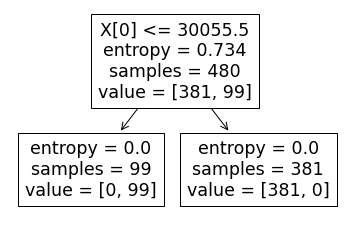

In [21]:
tree.plot_tree(model)

# Gini Criteria

In [22]:
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=3)
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [23]:
pred=model.predict(x_test)
np.mean(preds==y_test)

1.0

# Decision Tree Regression Example

In [24]:
from sklearn.tree import DecisionTreeRegressor

In [25]:
array=fr.values
x=array[:,0:7]
y=array[:,7]

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=1)

In [27]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

DecisionTreeRegressor()

In [28]:
model.score(x_test,y_test)

1.0

[Text(167.4, 163.07999999999998, 'X[0] <= 30055.5\nmse = 0.163\nsamples = 510\nvalue = 0.206'),
 Text(83.7, 54.360000000000014, 'mse = 0.0\nsamples = 105\nvalue = 1.0'),
 Text(251.10000000000002, 54.360000000000014, 'mse = 0.0\nsamples = 405\nvalue = 0.0')]

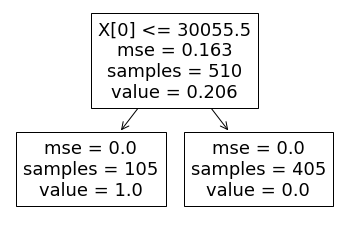

In [29]:
tree.plot_tree(model)